# Evasão no Ensino Superior

* **Um estudo de caso com os aluno do curso de Bacharel em Estatística do Departamento de Estatística e Ciências Atuarias da UFS;**

### Objetivo:
* **Identificar os fatores que poderiam levar estudantes dos curso de Estatística se evadirem.**

In [1]:
# Carregando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Carregando base de dados

dados = pd.read_excel('BD_Evasao.xls')

In [3]:
# Visualizando os dados

dados.head(3)

,ID,MATRICULA,CURSO,IDADE,GENERO,ANO_INGRESSO,B01_01,B01_02,B01_03,B01_04,...,B02_25,B02_26,B02_27,B02_28,B02_29,TROCA_CURSO,TROCA_CURSO_MOTIVO,REPROVADO_TE,REPROVADO_TE_MOTIVO,COMENTARIO
0,2,2.016000e+11,Estatística,20.0,F,2016.0,0.0,2,0.0,0,...,1,3,1.0,1,2.0,1,NaN,1.0,NaN,NaN
1,3,2.017001e+11,Estatística,20.0,M,2017.0,2.0,2,1.0,2,...,2,2,2.0,1,2.0,1,NaN,1.0,NaN,NaN
2,4,2.017000e+11,Estatística,18.0,M,2017.0,2.0,2,2.0,2,...,2,2,3.0,0,2.0,1,NaN,1.0,NaN,NaN


In [4]:
# Realizando transformação na coluna matricula

dados['MATRICULA'] = dados['MATRICULA'].values.astype(np.int64)

In [5]:
# Conferindo a transformação

dados.head(3)

,ID,MATRICULA,CURSO,IDADE,GENERO,ANO_INGRESSO,B01_01,B01_02,B01_03,B01_04,...,B02_25,B02_26,B02_27,B02_28,B02_29,TROCA_CURSO,TROCA_CURSO_MOTIVO,REPROVADO_TE,REPROVADO_TE_MOTIVO,COMENTARIO
0,2,201600034910,Estatística,20.0,F,2016.0,0.0,2,0.0,0,...,1,3,1.0,1,2.0,1,NaN,1.0,NaN,NaN
1,3,201700119958,Estatística,20.0,M,2017.0,2.0,2,1.0,2,...,2,2,2.0,1,2.0,1,NaN,1.0,NaN,NaN
2,4,201700035491,Estatística,18.0,M,2017.0,2.0,2,2.0,2,...,2,2,3.0,0,2.0,1,NaN,1.0,NaN,NaN


### Estatística Descritiva

In [6]:
# Calculando a média de idade dos estudantes

print('A média de idade dos estudantes é de {:.1f} com desvio padrão de {:.1f}'.format(
    dados.IDADE.mean(), np.std(dados.IDADE)
))

A média de idade dos estudantes é de 25.2 com desvio padrão de 8.2


In [7]:
# Gênero

dados.GENERO.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'

M    56.7%
F    43.3%
Name: GENERO, dtype: object

In [8]:
# Porcentagem de estudantes que pensaram em trocar de curso
# 0 = Alunos que pensaram em trocar de curso;
# 1 = Alunos que não pensaram em trocar de curso.

dados.TROCA_CURSO.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'

1    55.9%
0    44.1%
Name: TROCA_CURSO, dtype: object

### Análise de Dados 1: buscando pontos positivos e negativos

**1º) Fatores que influenciaram minha escolha do curso**

* **B01_01:** Qualidade da escola pública;
* **B01_02:** Gratuidade do curso;
* **B01_03:** Localização da UFS;
* **B01_04:** Possibilidade de obter assistência estudantil: bolsa/auxílio;
* **B01_05:** Baixa concorrência para entrar no curso;
* **B01_06:** Impossibilidade de escolher outro curso;
* **B01_07:** Informações que eu possuía sobre o curso antes do ingresso;
* **B01_08:** Interesse/afinidade com a área do curso ou atuação profissional;
* **B01_09:** Maiores chances para conseguir um trabalho/emprego.

In [9]:
a1 = dados['B01_01'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
a2 = dados['B01_02'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
a3 = dados['B01_03'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
a4 = dados['B01_04'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
a5 = dados['B01_05'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
a6 = dados['B01_06'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
a7 = dados['B01_07'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
a8 = dados['B01_08'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
a9 = dados['B01_09'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'

bloco1 = pd.DataFrame({'B01_01': a1, 'B01_02': a2, 'B01_03': a3, 'B01_04': a4,
                       'B01_05': a5, 'B01_06': a6, 'B01_07': a7, 'B01_08': a8,
                       'B01_09': a9,})

In [10]:
bloco1

,B01_01,B01_02,B01_03,B01_04,B01_05,B01_06,B01_07,B01_08,B01_09
0.0,14.9%,10.3%,44.8%,64.7%,38.2%,55.2%,23.5%,11.9%,19.1%
1.0,32.8%,14.7%,26.9%,20.6%,50.0%,29.9%,44.1%,47.8%,39.7%
2.0,52.2%,75.0%,28.4%,14.7%,11.8%,13.4%,30.9%,40.3%,41.2%
*,NaN,NaN,NaN,NaN,NaN,1.5%,1.5%,NaN,NaN


**2º) Conteúdo e Curso**

* **B02_01:** Afinidade com o curso escolhido;
* **B02_02:** Relação do meu curso com meus interesses pessoais;
* **B02_03:** Carga horária semanal do curso;
* **B02_04:** Esclarecimento de dúvidas quanto ao conteúdo das disciplinas;
* **B02_05:** Importância dos conteúdos aprendidos;
* **B02_06:** Compreensão dos conteúdos das disciplinas;
* **B02_07:** Relação entre a teoria e prática nas disciplinas;
* **B02_08:** Atendimento de minhas expectativas no curso;
* **B02_09:** Contribuição do curso para minha formação profissional;
* **B02_10:** Sistema de avaliação utilizado no curso;
* **B02_11:** Desempenho no curso até o momento.

In [11]:
b1 = dados['B02_01'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
b2 = dados['B02_02'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
b3 = dados['B02_03'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
b4 = dados['B02_04'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
b5 = dados['B02_05'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
b6 = dados['B02_06'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
b7 = dados['B02_07'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
b8 = dados['B02_08'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
b9 = dados['B02_09'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
b10 = dados['B02_10'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
b11 = dados['B02_11'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'

bloco2 = pd.DataFrame({'B02_01': b1, 'B02_02': b2, 'B02_03': b3, 'B02_04': b4,
                       'B02_05': b5, 'B02_06': b6, 'B02_07': b7, 'B02_08': b8,
                       'B02_09': b9, 'B02_10': b10, 'B02_11': b11})

In [12]:
bloco2

,B02_01,B02_02,B02_03,B02_04,B02_05,B02_06,B02_07,B02_08,B02_09,B02_10,B02_11
0.0,6.1%,13.4%,6.2%,9.0%,7.5%,7.5%,22.7%,11.9%,4.5%,9.2%,23.9%
1.0,51.5%,44.8%,49.2%,44.8%,34.3%,59.7%,60.6%,59.7%,41.8%,41.5%,58.2%
2.0,42.4%,40.3%,43.1%,46.3%,58.2%,32.8%,16.7%,28.4%,53.7%,49.2%,17.9%
*,NaN,1.5%,1.5%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**3º) Estrutura e Apoio da Instituição**

* **B02_12:** Apoio pedagógico (monitoria, atendimento dos professores, aulas de reforço, etc.);
* **B02_13:** Estrutura física em geral: sala de aula, biblioteca, laboratório etc;
* **B02_14:** Metodologias de ensino adotadas pelos professores;
* **B02_15:** Interesse dos professores pela minha aprendizagem;
* **B02_16:** Obtenção de orientações da coordenação do curso quando solicitadas;
* **B02_17:** Disponibilidade de informações sobre o funcionamento do curso e/ou instituição.

In [13]:
c1 = dados['B02_12'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
c2 = dados['B02_13'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
c3 = dados['B02_14'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
c4 = dados['B02_15'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
c5 = dados['B02_16'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
c6 = dados['B02_17'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'

bloco3 = pd.DataFrame({'B02_12': c1, 'B02_13': c2, 'B02_14': c3, 'B02_15': c4,
                       'B02_16': c5, 'B02_17': c6,})

In [14]:
bloco3

,B02_12,B02_13,B02_14,B02_15,B02_16,B02_17
0.0,3.0%,9.0%,13.4%,10.8%,4.5%,10.9%
1.0,57.6%,43.3%,56.7%,46.2%,13.4%,54.7%
2.0,39.4%,47.8%,29.9%,43.1%,22.4%,34.4%
3.0,NaN,NaN,NaN,NaN,59.7%,NaN


**4º) Ambiente Escolar**

* **B02_18:** Bem-estar do estudante nesta Instituição;
* **B02_19:** Relacionamento com os professores;
* **B02_20:** Relacionamento com os colegas de sala;
* **B02_21:** Integração e acolhimento do estudante ao ambiente escolar;
* **B02_22:** Interação com os professores fora do horário das aulas.

In [15]:
d1 = dados['B02_18'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
d2 = dados['B02_19'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
d3 = dados['B02_20'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
d4 = dados['B02_21'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
d5 = dados['B02_22'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'

bloco4 = pd.DataFrame({'B02_18': d1, 'B02_19': d2, 'B02_20': d3, 'B02_21': d4,
                       'B02_22': d5})

In [16]:
bloco4

,B02_18,B02_19,B02_20,B02_21,B02_22
0.0,7.6%,9.0%,4.5%,11.9%,5.9%
1.0,45.5%,32.8%,34.3%,50.7%,29.4%
2.0,47.0%,58.2%,61.2%,37.3%,35.3%
3.0,NaN,NaN,NaN,NaN,29.4%


**5º) Fatores Pessoais**

* **B02_23:** Tempo disponível para realizar as atividades extraclasse;
* **B02_24:** Possibilidade para conciliar as atividades do curso com atividades de lazer ou compromisso familiares;
* **B02_25:** Motivação com os estudos;
* **B02_26:** Possiilidade de conciliar trabalho e estudo;
* **B02_27:** Transporte/Locomoção para ir e vir para a Instituição;
* **B02_28:** Base dos conhecimentos adquiridos nas escolas em que estudei anteriormente para a minha aprendizagem no curso;
* **B02_29:** Incetivos aos estudos pela minha família ou por outras pessoas importantes para mim

In [17]:
e1 = dados['B02_23'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
e2 = dados['B02_24'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
e3 = dados['B02_25'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
e4 = dados['B02_26'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
e5 = dados['B02_27'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
e6 = dados['B02_28'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
e7 = dados['B02_29'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'

bloco5 = pd.DataFrame({'B02_23': e1, 'B02_24': e2, 'B02_24': e3, 'B02_26': e4,
                       'B02_27': e5, 'B02_28': e6, 'B02_29': e7,})

In [18]:
bloco5

,B02_23,B02_24,B02_26,B02_27,B02_28,B02_29
0.0,23.5%,19.1%,19.1%,10.4%,36.8%,7.5%
1.0,58.8%,51.5%,38.2%,28.4%,38.2%,25.4%
2.0,17.6%,29.4%,14.7%,34.3%,25.0%,67.2%
3.0,NaN,NaN,27.9%,26.9%,NaN,NaN


### Análise dos Dados 2: motivos que mais influenciam os estudantes a se evadirem

In [19]:
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud

In [20]:
corpus = PlaintextCorpusReader("Arquivos", ".*")

arquivos = corpus.fileids()

comentarios = corpus.raw("comentarios.txt")
troca_de_curso = corpus.raw("troca_de_curso.txt")
reprovação = corpus.raw("reprovacao.txt")

In [21]:
todo_texto = corpus.raw()

stops = stopwords.words("portuguese")

mapa_cores = ListedColormap(['orange', 'green', 'red', 'magenta'])

nuvem1 = WordCloud(background_color = 'white',
                   colormap = mapa_cores,
                   stopwords = stops,
                   max_words = 100)
nuvem2 = WordCloud(background_color = 'white',
                   colormap = mapa_cores,
                   stopwords = stops,
                   max_words = 100)
nuvem3 = WordCloud(background_color = 'white',
                   colormap = mapa_cores,
                   stopwords = stops,
                   max_words = 100)

nuvem1.generate(comentarios)
nuvem2.generate(troca_de_curso)
nuvem3.generate(reprovação)

(-0.5, 399.5, 199.5, -0.5)

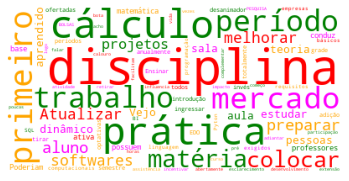

In [22]:
# Comentários a respeito do curso

plt.imshow(nuvem1)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

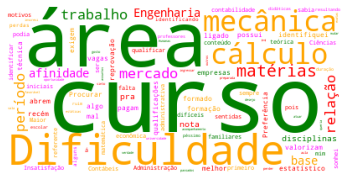

In [23]:
# Motivos da escolha do curso ou uma possível troca

plt.imshow(nuvem2)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

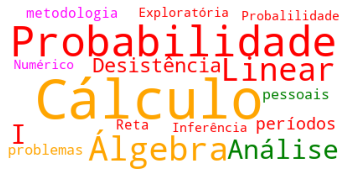

In [24]:
# Disciplinas que mais reprovam ou causam maiores dificuldades aos estudantes

plt.imshow(nuvem3)
plt.axis("off")

### Resultados

**Pontos positivos:**
* Declararam-se motivados com os estudos;
* Estão bem ambientados com o meio acadêmico;
* Possuem boa relação com os professores e os colegas de curso;
* A qualidade da instituição e a gratuidade do curso foram importantes para a escolha de ingressarem na universidade;
* Estão satisfeitos com o apoio pedagógio que recebem.

**Ponto negativos:**
* Apenas 27,9% dos estudantes tem tempo integral para os estudos;
* Parte dos alunos ingressaram no curso sem informações sobre o mesmo;
* Relação entre a teoria e a prática;
* Desempenho acadêmico até o momento (alunos com dificuldades em algumas matérias);
* Falta de procura por parte dos alunos por orientações aos coordenadores do curso.

**Fatores que mais influenciam para a ocorrência de evasão**
* Falta de afinidade com a área de exatas;
* Preferência por outros cursos;
* Incerteza quanto ao mercado de trabalho;
* Reprovação (principalmente nos 4 primeiros semestres);
* Dificuldades de conciliar trabalho e estudo.

**Artigo Publicado:** https://ri.ufs.br/bitstream/riufs/13191/17/16.pdf

**Estudo realizado no periodo de 01/07/2019 a 31/12/2019 sobre bolsa INTEGRAUFS.**